# 2.7 Process Data Representation and Analysis

In a chemical process, many measurements must be taken indirectly. For example, to get concentration, C, you might measure a quantity, X (thermal or electrical conductivity), which varies in a known manner with C. Then use the relationship to determine C.

**Calibration** - separate experiment in which solutions of known concentration are prepared and X is measured for each solution.

Consider an experiment in which a variable, y, is measured for several values of another variable, x.

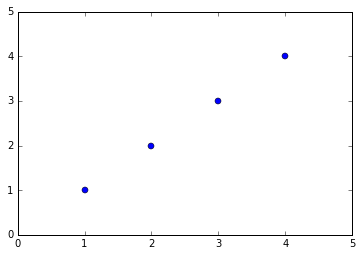

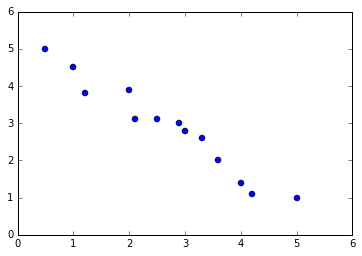

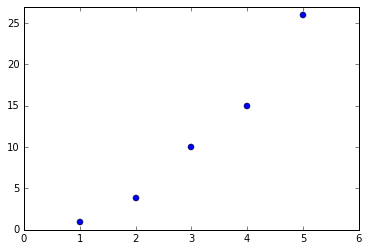

[[1.0, 0.3], [2.0, 0.7], [3.0, 1.2], [4.0, 1.8]]


In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

# data set a
data_ax = [1, 2, 3, 4]
data_ay = [1, 2, 3, 4]

# data set b
data_bx = [0.5, 1, 1.2, 2, 2.1, 2.5, 2.9, 3.0, 3.3, 3.6, 4.0, 4.2, 5.0]
data_by = [5.0, 4.5, 3.8, 3.9, 3.1, 3.1, 3.0, 2.8, 2.6, 2, 1.4, 1.1, 1.0]

# data set c
data_cx = [1, 2, 3, 4, 5]
data_cy = [1, 3.8, 10, 15, 26]

datatable = [[1.0, 0.3], [2.0, 0.7], [3.0, 1.2], [4.0, 1.8]]

# plot data set a
plt.plot(data_ax, data_ay, 'bo')
plt.xlim(0,5)
plt.ylim(0,5)
plt.show()

# plot data set b
plt.plot(data_bx, data_by, 'bo')
plt.xlim(0,6)
plt.ylim(0,6)
plt.show()

# plot data set c
plt.plot(data_cx, data_cy, 'bo')
plt.xlim(0,6)
plt.ylim(0,27)
plt.show()

print(datatable)

Use calibration data to estimate the value of y for a value of x between tabulated points (interpolation) or outside the range of the table data (extrapolation)

dataA and dataB look to be linear but dataC looks like a curve is more appropriate

One could draw a line from the data points and create a basic linear function. Other methods are explored below.

## 2.7a Two-point Linear Interpolation

Equation of a line through two points $(x_1, y_1)$ and $(x_2, y_2)$ on a plot of $y$ vs $x$ is:

$$
y = y_1 + \frac{x - x_1}{x_2 - x_1} \times (y_2 - y_1)
$$

### Test Yourself

#### Problem 1
Values of a variable (f) are measured at several times (t):

In [23]:
f = [1, 4, 8]
t = [1, 2, 3]

Show that if two-point linear interpolation is used:
- $f(t=1.3) = 1.9$
- $t(f=5) = 2.25$

In [1]:
# sympy needed for CAS
from sympy import *
x, y = symbols('x y')

# Use first sets of points
y1 = 1
y2 = 4
x1 = 1
x2 = 2

y = y1 + ((x - x1)/(x2 - x1))* (y2 - y1)
print(y)

3*x - 2


In [2]:
# sub x = 1.3
y.subs(x,1.3)

1.90000000000000

In [3]:
# Use other sets of points
y1 = 4
y2 = 8
x1 = 2
x2 = 3

y = y1 + ((x - x1)/(x2 - x1))* (y2 - y1)
print(y)

4*x - 4


In [7]:
# solve for x when y = 5
solve(Eq(y,5),x)

[9/4]

In [8]:
# Convert answer to decimal number
9/4

2.25

### Problem 2

If a function $y(x)$ appears as shown in each of the diagrams below, would two-point linear interpolation yield estimates of $y$ that are too high, too low, or correct? If the two-point linear interpolation formula were used to estimate $y(x)$ from the tabulated values of $(x_1, y_1)$ and $(x_2, y_2)$ in plot (b), would the estimated value be too high or too low?

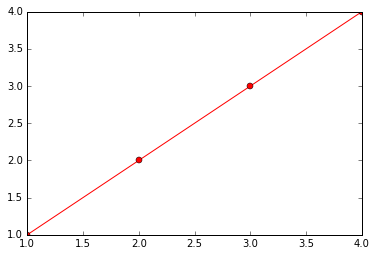

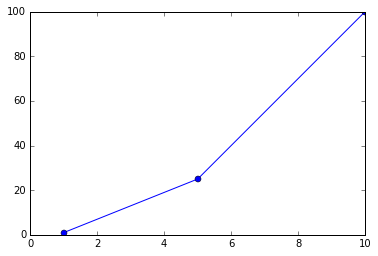

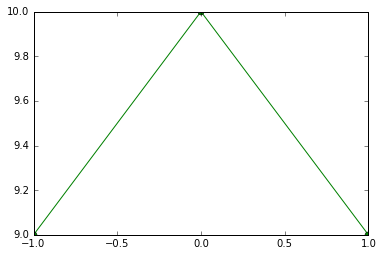

In [52]:
import matplotlib.pyplot as plt
%matplotlib inline

# data set A
data_Ax = [1,2,3,4]
data_Ay = [1,2,3,4]

# data set B
data_Bx = [1, 5, 10]
data_By = [1, 25, 100]

# data set C
data_Cx = [-1, 0, 1]
data_Cy = [9, 10, 9]

# plot data set A
plt.plot(data_Ax, data_Ay, 'ro-')
plt.ylim(1,4)
plt.xlim(1,4)
plt.show()

# plot B, should look more like x**2
plt.plot(data_Bx, data_By, 'bo-')
plt.ylim(0,100)
plt.xlim(0,10)
plt.show()

# plot C, should look more like -x**2
plt.plot(data_Cx, data_Cy, 'go-')
plt.ylim(9,10)
plt.xlim(-1,1)
plt.show()

using the two-point linear interpolation forumla for 

(a) would be about right

(b) would be too low. Slope is increaing at increasing rate

(c) would be too high. Slow is increasing between points 1 and 2 but point 2 appears to be a point of inflection. Slope is decreasing between points 2 and 3.

## 2.7b Fitting a Straight Line

How one variable depends on another can be expressed with an equation:

$$y = 3x + 4 $$
$$y = 4.24(x - 3)^2 - 23 $$
$$y = (1.3 * 10^7) \times \text{sin}(2x)/(x^{1/2} + 58.4)$$

Using data points of dependent variable ($y$) at various values of the independent variable ($x$), you can plot $y$ vs $x$.

If it appears to be a straight line, you can use the equation

$y = a x + b$

If there is little scatter (as in plot (a) above) you can draw a line through them by inspection. If $(x_1, y_1)$ and $(x_2, y_2)$ are two points (which may or may not be data points) then:

Slope:
- $a = \frac{y_2 - y_1}{x_2 - x_1}$

Intercept:
- $b = y_1 - a x_1$, or
- $b = y_2 - a x_2$

Calculate $a$ then use it and one point to find $b$

### Example 2.7-1
#### Fitting a straight line to flowmeter calibration data

Rotameter calibration data (flow rate vs rotameter reading) are as follows

In [53]:
Vflow = [20.0, 52.1, 84.6, 118.3, 151.0]
R = [10, 30, 50, 70, 90]

##### Problem 1
Draw a calibration curve and determine an equation for $V_\text{flow}(R)$

In [56]:
# sympy needed for CAS
from sympy import *
R, V = symbols('R V')

# Use first sets of points
V1 = 20.0
V2 = 52.1
R1 = 10
R2 = 30

# Setup equation
V = V1 + ((R - R1)/(R2 - R1))* (V2 - V1)
print(V)

1.605*R + 3.95

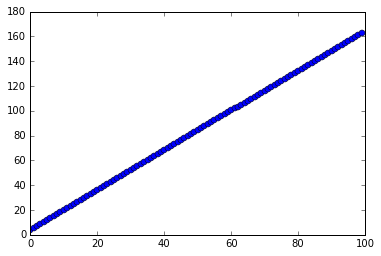

In [64]:
# matplotlib needed for plotting
import matplotlib.pyplot as plt
%matplotlib inline

# create x values 0 to 100 and find corresponding y values
x1 = range(100)
y1 = []
for i in range(100):
    y1.append(V.subs([(R, x1[i])]))

# plot resulting coordinates
plt.plot(x1, y1, 'bo-')

##### Probelm 2
Calculate the flow rate that corresponds to a rotameter reading of 36

In [62]:
# use previously interpolated formula and substitute R=36
V.subs(R,36)

61.7300000000000

## 2.7c Fitting nonlinear data

423 experimenters measured and plotted data and found that their data points did not lie on straight points.

416 people said close enough but 7 used a different equation than

$$y = a x + b$$

suppose x and y are related by the equation

$$y^2 = a x^3 + b$$

a plot of measured $y$ vs $x$ would be curved but a plot of $y^2$ vs $x^3$ would be a straight line with slope $a$ and intercept $b$

if

$$(\text{Quantity }1) = a (\text{Quantity }2) + b$$

then a plot of the first quantity vs the second on rectangular coordinates produces a straight line with slope $a$ and intercept $b$

Here are several examples:

### Example 1
$$y = a x^2 + b$$
plot $y$ vs $x^2$

### Example 2
$$y^2 = \frac{a}{x} + b$$
plot $y^2$ vs $1/x$

### Example 3
$$1/y = a(x + 3) + b$$
plot $1/y$ vs $(x+3)$

### Example 4
$$\text{sin} y = a(x^2 - 4)$$
plot $\text{sin} y$ vs $(x^2 - 4)$
- note: must draw line through origin

Sometimes you'll have to rearrange the terms but you can still plot a linear plot

### Example 5
$$y = \frac{1}{(c_1 x - c_2)} $$

-> $$1/y = c_1 x - c_2$$

plot $1/y$ vs $c_1$ with intercept $= -c2$

### Example 6
$$y = 1 + x(m x^2 + n)^{1/2}$$

-> $$(y-1)^2/x^2 = m x^2 + n$$

plot $(y-1)^2/x^2$ vs $x^2$ with slope $= m$ and intercept $= n$

*Summarized*: 
If you have $(x, y)$ data that you can write of the form 

$$f(x, y) = a \times g(x, y) + b$$

- calculate $f(x, y)$ and $g(x, y)$ for each $(x, y)$ point. plot $f$ vs $g$
- if it fits on a straight line, choose two points on the line $(g_1, f_1)$ and $(g_2, f_2)$ and calculate $a$ and $b$

$$a = (f_2 - f_1)/(g_2 - g_1)$$

- $b = f_1 - a \times g_1$ or
- $b = f_2 - a \times g_2$

## Example 2.7-2
### Linear curve-fitting of nonlinear data

A mass flow rate mflow (g/s) is measured as a function of temperature T (degrees C)

In [2]:
mflow = [14.76, 20.14, 27.73, 38.47]
T = [10, 20, 40, 80]

Believe mflow varies linearly with square root of T

$$m_{flow} = a \times T^{1/2}$$

use a straight-line plot to verify this formula and determine a and b

If the formula is correct, a plot of $m_{flow}$ vs $T^{1/2}$ should be linear with slope $= a$ and intercept $ = b$. The data table is augmented by adding a $T^{1/2} row:

In [4]:
T_sqrt = []
for t in T:
    T_sqrt.append(t**(1/2))
print(T)
print(T_sqrt)
print(mflow)

[10, 20, 40, 80]
[3.1622776601683795, 4.47213595499958, 6.324555320336759, 8.94427190999916]
[14.76, 20.14, 27.73, 38.47]


and $m_{flow}$ is plotted versus $T^{1/2}$

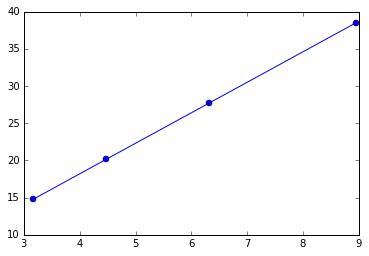

In [8]:
# matplotlib needed for plotting
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(T_sqrt, mflow, 'bo-')

Since the plot is linear, the proposed formula is verified. A line drawn through the data points passes through the first and last points so these points may be used to calculate the slope and intercept

In [11]:
T1_sqrt = T_sqrt[0]
m1flow = mflow[0]
T2_sqrt = T_sqrt[3]
m2flow = mflow[3]

# calc slope, a
a = (m2flow - m1flow)/(T2_sqrt - T1_sqrt)

# calc intercept, b
b = m1flow - a * T1_sqrt

In [12]:
from sympy import *
T = symbols('T')

# create mflow = a * T + b expression
m = a * T + b
m

4.10066129012389*T + 1.79257041032397

Two nonlinear functions that often occur are 

exponential functions:
- $y = a e^{b x}$

where $e \approx 2.7182818$

power law:
- $y = a x^b$

$$P = e^Q <-> \text{ln }P = Q$$

$\text{ln}(e^q) = Q$, and

$e^{\text{ln }(P)} = P$

Calculate natural log using relation

$$\text{ln }x = 2.302585 \times ln_{10} x$$

In [15]:
import math

# check what ln 2 is (log without second arg is natural log in python)
math.log(2)

0.6931471805599453

In [17]:
# use expression to calc natual log of 2 and compare to above
2.302585 * math.log(2, 10)

0.693147152565948

$y = ae^{bx} -> \text{ln }y = \text{ln }a + b x$

plot $\text{ln }y$ vs $x$

$y = a*x^b -> \text{ln }y = \text{ln }a + b \text{ln }x$

plot $\text{ln }y$ vs $\text{ln }x$

### Test Yourself

#### Problem 1
The following plot is generated from experimental data (x, y):
- What equation would you use to relate x and y?
- Note: image appears to be $y = x$ but axis is $y$ vs $x^2 - 2$

#### Solution 1

$y = a (x^2 - 2) + b$

#### Problem 2

How would you plot (x, y) data to get a straight line and how would you determine a and b for each of the following functions?

##### Part A
$$y = a  x^{1/2}+ b$$
Plot $y$ vs $x^{1/2}$

##### Part B 
$$1/y = a (x - 3)^2 + b$$
plot $1/y$ vs $(x -3)^2$

##### Part C
$$y = (a   x^2 - b)^{1/3}$$
plot $y^3$ vs $x^2$

##### Part D
$$\text{sin }y = x (a x + b)^{-2}$$
plot $(x/\text{sin }y)^{1/2}$ vs $x$

##### Part E
$$y = a  e^{b x}$$
$$\text{ln }y = \text{ln }a + b x$$
plot $\text{ln }y$ vs $x$

##### Part F
$$y = a  x^b$$
$$\text{ln }y = \text{ln }a + b \text{ln }x$$
plot $\text{ln }y$ vs $\text{ln }x$

## 2.7d Logarithmic Coordinates

- ** Semilog plot ** - a plot with one axis that uses a log scale
- ** Log plot ** - a plot where both axis use a log scale

When you plot values of a variable $y$ on a logarithmic scale you are in effect plotting the logarithm of $y$ on a rectangular scale

Suppose that $y$ and $x$ are related by the equation

$$y = a e^{b x} \text{ln }y = \text{ln }a + b x$$

To determine $a$ and $b$, you may plot $y$ vs $x$ on a semilog plot or you may plot $\text{ln }y$ vs $x$ on a rectangular plot. In either case, you obtain $a$ and $b$

$$
b 
= (\text{ln }y_2 - \text{ln }y_1)/(x_2 - x_1)
= (\text{ln }(y_2/y_1))/(x_2 - x_1)
$$

$$\text{ln }a = \text{ln }y_1 - b x_1$$
or
$$\text{ln }a = \text{ln }y_2 - b x_2$$

$$->a = e^{\text{ln }a}$$

In summary,

- If $y$ vs $x$ data appear on semilog plot, $\text{ln }y$ vs $x$ would be linear on a rectangular plot and data can be correlated by an exponential function

$$y = a e^{b x}$$

- If $y$ vs $x$ data appear linear on a log plot, then $\text{ln }y$ vs $\text{ln }x$ would be linear on rectangular plot and data can be correlated by a power law

$$y = a x^b$$

- When you plot variable $z$ on a logarithmic axis and your plot yields a straight line through two points with coordinate values $z_1$ and $z_2$, replace $z_2-z_1$ with $\text{ln}(z_2/z_1)$ in formula for slope

- Do not plot values of $\text{ln }z$ on a logarithmic scale and expect anything useful to result (plot $z$ on logarithmic axis or $\text{ln }z$ on rectangular axis)

### Example 2.7-3
#### Curve fitting on semilog and log plots

A plot of $F$ vs $t$ yields a line that passes through the points 
$(t_1 = 15, F_1 = 0.298)$ and $(t_2 = 30, F_2 = 0.0527)$ on

- semilog plot, and
- log plot

For each calculate the equation that relates $F$ and $t$

In [9]:
from sympy import *
F, t = symbols('F t')

ts = [15, 30]
Fs = [0.298, 0.0527]

# ln(F) = b*t + ln(a)
# F = a*e^(b*t)

t1 = ts[0]
t2 = ts[1]
F1 = Fs[0]
F2 = Fs[1]

# ln(F) = b*t + ln(a)
# ln(F2) - ln(F1) = b*t2 - b * t1 + ln (a) - ln (a)
# ln(F2/F1) = b * (t2 - t1)
# b = ln(F2/F1)/(t2 - t1)
b = ln(F2/F1)/(t2 - t1)

# calc ln(a) first
# ln(F) = b*t + ln(a)
# ln(F1) - b * t1 = ln(a)
a = ln(F1) - b * t1

# change to just 'a'
# exp(ln(a)) = a 
a = exp(a)

# create formula for F
F = a*exp(b*t)
print(F)

1.68508538899431*exp(-0.115498535397206*t)


In [10]:
from sympy import *
F, t = symbols('F t')

ts = [15, 30]
Fs = [0.298, 0.0527]

# ln(F) = b*t + ln(a)
# F = a*t^b

t1 = ts[0]
t2 = ts[1]
F1 = Fs[0]
F2 = Fs[1]

# ln(F) = b*ln(t) + ln(a)
# ln(F2) - ln(F1) = b * ln(t2) - b * ln(t1) + ln(a) - ln(a)
# ln(F2/F1) = b * (ln(t2) - ln(t1)
# ln(F2/F1) = b * (ln(t2/t1))
# ln(F1/F1)/ln(t2/t1) = b
b = ln(F2/F1)/ln(t2/t1)

# calc ln(a) first
# ln(F) = b*ln(t) + ln(a)
# ln(F1) - b*ln(t1) = ln(a)
a = ln(F1) - b * ln(t1)
# change to just 'a'
# exp(ln(a)) = a 
a = exp(a)

# create formula for F; use evalf() to evaluate 'a' to a decimal
F = a.evalf()*t**(b)
(F)

259.288238736944*t**(-2.49943746371231)

### Test Yourself
#### Problem 1
The following plots yield straight lines. What are the equations that relate the variables?
##### Part a
$P$ vs $t$ on rectangular coordinates
$$P = at + b$$

##### Part b
$P$ (logarithmic axis) vs $t$ on a semilog plot
$$\text{ln }P = a  t + b$$
$$P = a e^{b t}$$

##### Part c
$P$ vs $t$ on a log plot
$$\text{ln }P = \text{ln }a + b\text{ln }t$$
$$P = a  t^b$$

##### Part d
$y^2 - 3$ (logarithmic axis) vs $1/x^2$ on a semilog plot (express answer as an exponential function)
$$\text{ln }(y^2 - 3) = a / x^2 + b$$
$$y^2 = a e^{b x^2}$$

##### Part e
$1/F$ vs $t^2 - 4$ on a log plot (express answer as power law)
$$\text{ln }(1/F) = \text{ln }a + b \text{ln }(t^2 - 4)$$
$$1/F = a (t^2 - 4)^b$$

#### Problem 2
What would you plot against what on what kind of axes to get a straight line for the following relationships (a and b are constants)?

##### Part a
$$P = a e^{b*t}$$
plot $\text{ln }P$ vs $t$ (semilog plot)

##### Part b
$$P = a  t^b$$
plot $P$ vs $t$ (log plot)

##### Part c
$$P^2 = e^{a t^3 + b}$$
plot $P^2$ vs $t^3$ (semilog plot)

##### Part d
$$1/P = a (t - 4)^{-b}$$
plot $1/P$ vs $t-4$ (log plot)

## 2.7e Fitting a line to scattered data
Measurements will rarely fit on a perfectly straight line. They will probably be scattered around a line. In these instances, many lines will appear to fit the data somewhat well. Use Linear Regression or Method of Least Squares to find the best fit line 

See Appendix A.1 (will be necessary for problems 2.39 to 2.42)